
# Project2: Understanding and Analysing Movies Trends

Made By: Hind Baageel 

My github page: https://github.com/hindahmad431

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we used a dataset called TMDB 5000 Movie Dataset from Kaggle. This dataset contains almost 5K movies data samples. Each sample is associated with 20 features including movie release date, popularity, vote average and many others. With the help of this dataset, we aim to to answer the following questions: 

<ul>
<li>What are the features that are positivaly correlated with revenue In which it can be used to maximize movies revenue.</li>
<li>Are there certain movies keywords associated with higher revenue? </li>
<li>What is the year that movies has achieved the best revenue?</li>
</ul> 


In [262]:
#Importing Importnant Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#setting the style for figures
sns.set_style('darkgrid')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section, the dataset will be loaded and preprocessed. The preprocessing step includes cleaning the dataset and its analyse datatypes. The step is important for us to be able to work with the dataset properly and extract useful insights. 

### General Properties

In [2]:
# Load the Data and Insepcting the first 3 lines and the data shape
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
#Checking Number of rows and columns in the dataset
df.shape

(4803, 20)

##### This dataset contains 4803 samples with 20 features each. Now let's analyse the datatypes for each feature

In [4]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

##### We can see that the datatypes is mostly correct except release date which needs to be converted to date type.

In [5]:
df['release_date']= pd.to_datetime(df['release_date'])
df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### Checking Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

> The column **revenue** looks like it doesn't have any missing values, but when we look at the values from the dataframe, we can see that null values is written as zeros. Thus, we replaced the zero values with the mean revenue.

In [7]:
#replacing zero revenue with the mean revenue.

mean_rev = df['revenue'].mean()

df['revenue'].replace(0, mean_rev, inplace=True)

> Let's check the column with the most missing value: Homepage

In [8]:
df.homepage.isnull().sum()

3091

> from seeing the null values in the homepage title, we can see that 3091 rows out of 4803 doesn't have the home page link. Since that this feature have too many missing values and the movie home page link will not bring any value for predicting movies score, we will drop this column.

In [9]:
#dropping the column 'homepage' from the movies dataframe
df.drop('homepage',axis=1, inplace=True)

df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Checking for duplicates

In [10]:
df.duplicated().sum()

0

> Fortunatly, there is no duplicated values, thus we can move on to the next step. 

<a id='eda'></a>
## Exploratory Data Analysis

> After the preprocessing step, this section will cover the data exploration. In this section, we aim to answer the research question using stastical and data visualization tools. 

### Research Question 1: What are the features that are positivaly correlated with revenue In which it can be used to maximize movies revenue.

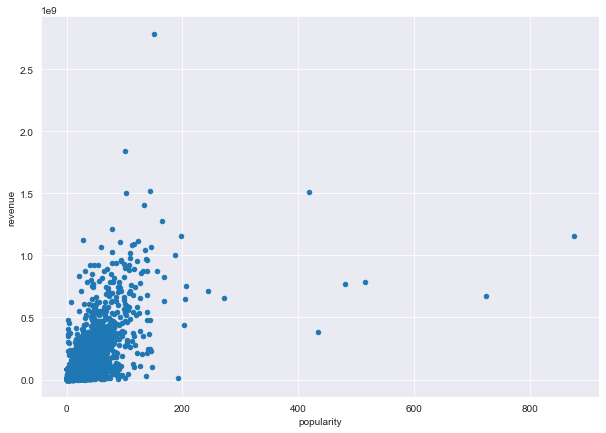

In [255]:
df.plot(x= 'popularity', y='revenue', kind='scatter', figsize=(10,7))

> ##### We can see that movies popularity is positivaly correlated with revnue. meaning if we increase the popularity of a movie through advertisment, the the movie will more likely recieve a better revenue.

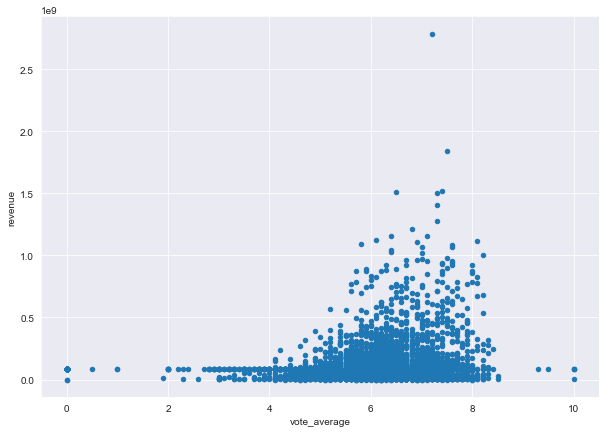

In [259]:
df.plot(x='vote_average', y='revenue', kind='scatter', figsize=(10,7))

> ##### We can see that movies that have recieved a voting average between 5 and 8 have recieved better revenues than the others. but we can't say that voting average is positivaly correlated with revenue. since that samples above 8 voting average haven't showed a signficant increase in revenue.

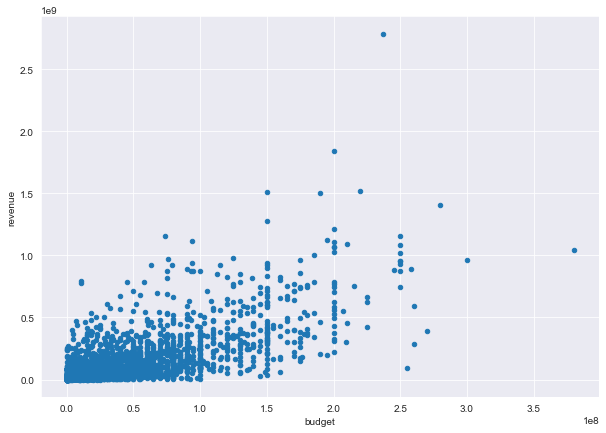

In [260]:
df.plot(x='budget', y='revenue', kind='scatter', figsize=(10,7))

> #### We can see that budget is positivaly correlated with revnue. which means movies with higher initial budget might recieve better revenue. 

### Research Question 2: Are there certain movies keywords associated with higher revenue?

to understand the correlation between differenet genres and revenue, we started first by analysing genres datatype which is String. Each keyword is saved in the string as a dictionery with Id. But as we are only interstedin a specfic keywords, we extracted the genres key words and saved it in a specfic column for each keyword as binary data. In other words, if a movie is considered an action movie, the action column will have 1, otherwise, it will have 0. That step was repeated for 9 keywords (action, adventure, family, thriller, crime, animation, drama, science fiction)

In [198]:
word1 ='Action'  
df['action'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):
    
    if(x.find(word1)!= -1):
        df['action'][i] = 1 
    else:
        df['action'][i] = 0

In [200]:
word2 ='Fantasy'
df['fantasy'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word2)!= -1):
        df['fantasy'][i] = 1
    else:
        df['fantasy'][i] = 0

In [201]:
word3 ='Adventure'
df['adventure'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word3)!= -1):
        df['adventure'][i] = 1
    else:
        df['adventure'][i] = 0

In [202]:
word4 ='Science Fiction'
df['Sci_fi'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word4)!= -1):
        df['Sci_fi'][i] = 1
    else:
        df['Sci_fi'][i] = 0

In [203]:
word5 ='Crime'
df['crime'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word5)!= -1):
        df['crime'][i] = 1
    else:
        df['crime'][i] = 0

In [204]:
word6 ='Drama'
df['drama'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word6)!= -1):
        df['drama'][i] = 1
    else:
        df['drama'][i] = 0

In [205]:
word7 ='Thriller'
df['thriller'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word7)!= -1):
        df['thriller'][i] = 1
    else:
        df['thriller'][i] = 0


In [206]:
word8 ='Family'
df['Family'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):

    if(x.find(word8)!= -1):
        df['Family'][i] = 1
    else:
        df['Family'][i] = 0

In [207]:
word9 ='Animation'
df['Animation'] = np.nan

#this for loop will look for rows with the a specfic keyword in the column genres.
#It will assign the newely created genres colmun either 0 or 1 
for x,i in zip(df['genres'], range(0,len(df['genres']))):
    
    if(x.find(word9)!= -1):
        df['Animation'][i] = 1
    else:
        df['Animation'][i] = 0

> #### At this step, we will compute the mean revnue for the newly created genres column

In [189]:
df.groupby('action').mean()['revenue']

action
0.0    9.096193e+07
1.0    1.564677e+08
Name: revenue, dtype: float64

In [190]:
df.groupby('adventure').mean()['revenue']

adventure
0.0    8.427168e+07
1.0    2.206349e+08
Name: revenue, dtype: float64

In [191]:
df.groupby('thriller').mean()['revenue']

thriller
0.0    1.086204e+08
1.0    1.013835e+08
Name: revenue, dtype: float64

In [192]:
df.groupby('fantasy').mean()['revenue']

fantasy
0.0    9.693915e+07
1.0    2.075170e+08
Name: revenue, dtype: float64

In [193]:
df.groupby('crime').mean()['revenue']

crime
0.0    1.103880e+08
1.0    8.494296e+07
Name: revenue, dtype: float64

In [194]:
df.groupby('Family').mean()['revenue']

Family
0.0    9.753482e+07
1.0    1.833516e+08
Name: revenue, dtype: float64

In [195]:
df.groupby('Animation').mean()['revenue']

Animation
0.0    9.983244e+07
1.0    2.408093e+08
Name: revenue, dtype: float64

In [196]:
df.groupby('adventure').mean()['revenue']

adventure
0.0    8.427168e+07
1.0    2.206349e+08
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Measuring most profitable movies genres')

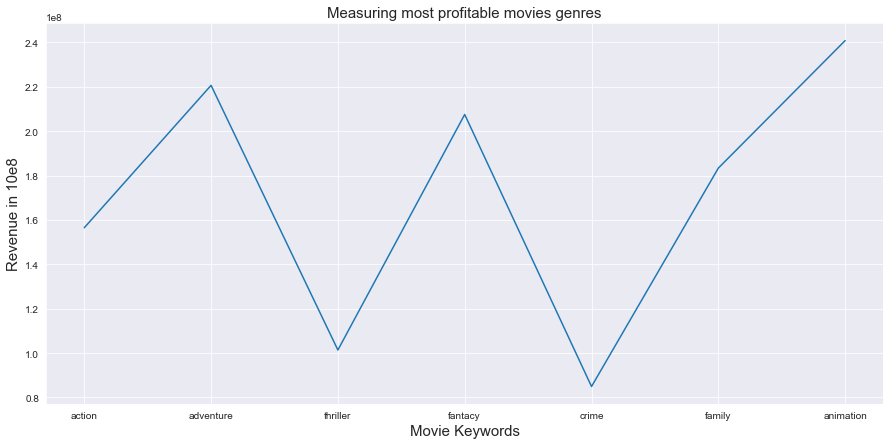

In [251]:
mean_rev = [1.564677e+08,2.206349e+08,1.013835e+08,2.075170e+08,8.494296e+07, 1.833516e+08,2.408093e+08]

labels = ['action', 'adventure', 'thriller', 'fantacy', 'crime', 'family', 'animation']

plt.figure(figsize=(15,7))
plt.plot(labels, mean_rev)

plt.xlabel('Movie Keywords',fontsize=15)
plt.ylabel('Revenue in 10e8', fontsize=15)
plt.title('Measuring most profitable movies genres', fontsize=15)

> ##### from seeing the above figure, we can say that animated movies has the highest revenue followed by adventure movies. Keywords such as (animation, adventure and fantacy were associated with higher averege revenue. 

### Research Question 3: What is the year that movies has achieved the best revenue?

To answer this question, we started by creating a new column that contain only the release date so that we can compute the average revenue for each year. 

In [ ]:
df['release_year'] = df['release_date'].dt.year

Text(0.5, 1.0, 'Measuring most profitable movies year')

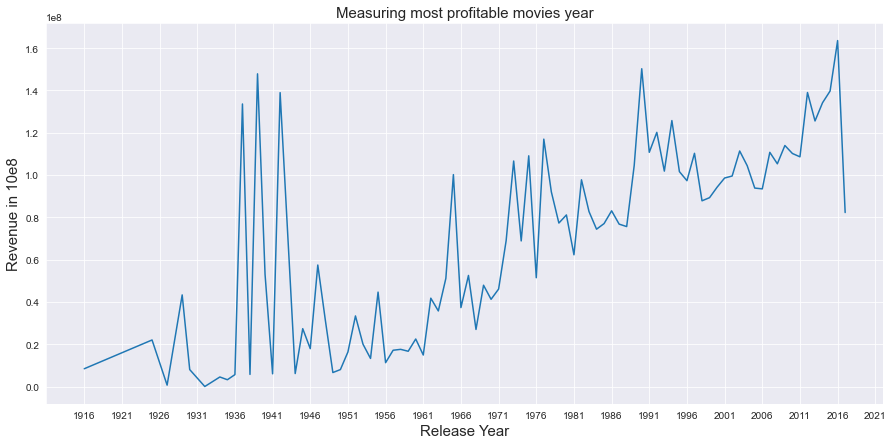

In [248]:

#setting the minimum and maximum xticks
min_year = df['release_year'].min()
max_year = df['release_year'].max()

#plotting the figure 
plt.figure(figsize=(15,7))
df.groupby('release_year').mean()['revenue'].plot(kind='line')

plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Revenue in 10e8', fontsize=15)
plt.title('Measuring most profitable movies year', fontsize=15)
plt.xticks(np.arange(min_year, max_year+5, 5))


> ##### from the figure, we can see that 2016 was the higher year of revnues in movies follwed by 1988. from the curve of the line we can see that the revenue is increasing by years. But, we observe that 2017 has witnessed a huge drop in revenue. 

### Research Question 4: what are the most common words on movies overview? 

to answer this question, we used wordcloud. Wordcloud is used to represent the frequency or the importance of a word in a text. words with higher frequency or importance shows bigger than the others. 
the implmented code was taken from <a href="#ref1">[1]</a> but was modified to serve the purpose of this project. 

In [273]:
text = " ".join(overview for overview in df.overview)

print ("There are {} words in the combination of all overviews.".format(len(text)))

There are 1470713 words in the combination of all overviews.


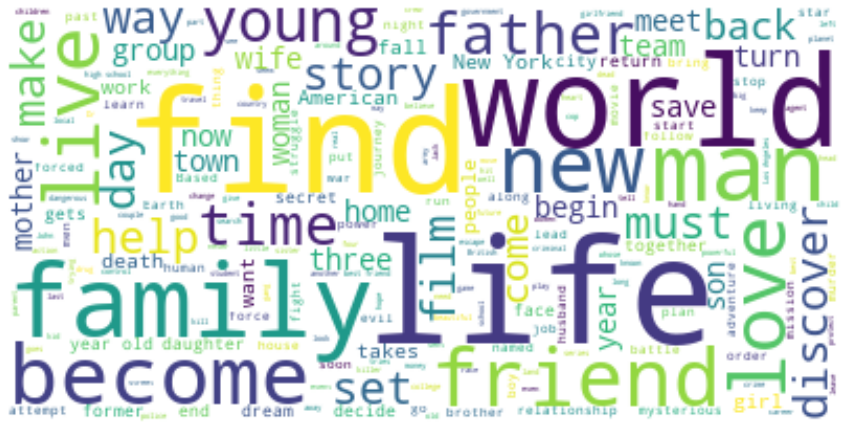

In [279]:
# Create stopword list(words that we don't want to show up in the wordcloud):
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "first", "take", "will"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image using matplotlib:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> #### from looking to the wordcloud, we can see that words such as life, world, find, family, love, friend and story usually appears in movies review. 

<a id='conclusions'></a>
## Conclusions

#### The insights gained from the exploration of movies dataset were very intersting. 

1- It was found that popularity and budget were positivaly correlated with revenue. Thus, these two features can be used to predict the revenue of movie. 

2- It was found that keywords such fantacy, adventure and animation are associated with better revenue. 

3- It was found that 2016 was the most profitable years in movies industry.

4- words such as family, life, world, story, find usually appears in movies overviews. 

One of the limitation of this experiment is that lot of revenue data is missing in the given dataset. Since we treated the revenue variable is our main dependent variable, the results might varies if we have increase the number with actual revnue values, not the mean value. 

# References

<a id='ref1'></a> Duong Vu, 2019, https://www.datacamp.com/community/tutorials/wordcloud-python